In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Training data**

In [58]:
x_train=np.array([[2104, 5, 1, 45],[1416, 3, 2, 40],[852, 2, 1, 35]])
y_train=np.array([460,232,178])

In [59]:
b_init=785.15
w_init=np.array([0.39,18.75,-53.36,-26.24])
print(f'b_init is just a Scalar :{b_init}')
print(f'w_init shap :{w_init.shape}')


b_init is just a Scalar :785.15
w_init shap :(4,)


In [60]:
m,n=x_train.shape
print(f'm represent nomber  of sample : {m}')
print(f'n represent nomber  of features : {n}')


m represent nomber  of sample : 3
n represent nomber  of features : 4


**Model function**

In [61]:
def model(x,w,b):
    F_wb=np.dot(x,w)+b
    return F_wb

In [62]:
y_pred=model(x_train,w_init,b_init)
print(f'Prediction : {y_pred}')

Prediction : [465.3  237.32 183.17]


**Cost function**

In [63]:
def cost(x,y,w,b)->float:
    m=len(x)
    error=model(x,w,b)-y
    mse=(1/(2*m))*np.sum(np.square(error))
    return mse

In [64]:
Jwb=cost(x_train,y_train,w_init,b_init)
print(f'The cost = {Jwb:.2f}')

The cost = 13.85


**Gradient function**

In [65]:
def Gradient(x,y,w,b):
    m=len(x)
    error=model(x,w,b)-y
    Gw=(1/(m))*x.T.dot(error)
    Gb=(1/(m))*(np.sum(error))
    return Gw , Gb


**Update function**

In [66]:
def update(Gw,Gb,w,b,alpha):
    w=w-alpha*Gw
    b=b-alpha*Gb
    return w,b

**Initialize parameters**

In [67]:
w = np.zeros(4)
w

array([0., 0., 0., 0.])

**Training loop**

In [68]:
alpha=1e-9
b = 0 # or np.mean(y_train)
w = np.zeros(n)
iterations=1000
J_wb=[]

for i in range(iterations):
    gw,gb=Gradient(x_train,y_train,w,b)
    w,b=update(gw,gb,w,b,alpha)
    mse=cost(x_train, y_train, w, b)
    J_wb.append(mse)
    if i % 100==0:
        print(f'Iteration {i}:| Cost: {mse:.2f} | w: {w} | b: {b}')



Iteration 0:| Cost: 49285.16 | w: [4.82669333e-04 1.11733333e-06 3.67333333e-07 1.20700000e-05] | b: 2.9000000000000003e-07
Iteration 100:| Cost: 30820.82 | w: [4.33631049e-02 1.00454897e-04 3.27447228e-05 1.08275028e-03] | b: 2.5999728128454502e-05
Iteration 200:| Cost: 19373.26 | w: [7.71267855e-02 1.78812374e-04 5.77495912e-05 1.92270673e-03] | b: 4.614060613009135e-05
Iteration 300:| Cost: 12275.97 | w: [1.03712030e-01 2.40650350e-04 7.69494158e-05 2.58099370e-03] | b: 6.189663128797994e-05
Iteration 400:| Cost: 7875.78 | w: [1.24645048e-01 2.89481047e-04 9.15784115e-05 3.09623606e-03] | b: 7.420007056663332e-05
Iteration 500:| Cost: 5147.74 | w: [1.41127565e-01 3.28069949e-04 1.02608386e-04 3.49884664e-03] | b: 8.378498113455073e-05
Iteration 600:| Cost: 3456.40 | w: [1.54105802e-01 3.58594570e-04 1.10804531e-04 3.81277217e-03] | b: 9.122935185879926e-05
Iteration 700:| Cost: 2407.80 | w: [1.64324808e-01 3.82769460e-04 1.16769350e-04 4.05686805e-03] | b: 9.698828507307777e-05
Iter

In [69]:
print(f"w: {w}")
print(f"b: {b}")


w: [1.83651522e-01 4.29213491e-04 1.25524261e-04 4.50255798e-03]
b: 0.00010734897166877989


**Predictions**

In [70]:
Prediction=model(x_train,w,b)
Prediction

array([386.60779533, 260.23230283, 156.62977716])

**Plot Cost vs Iterations**

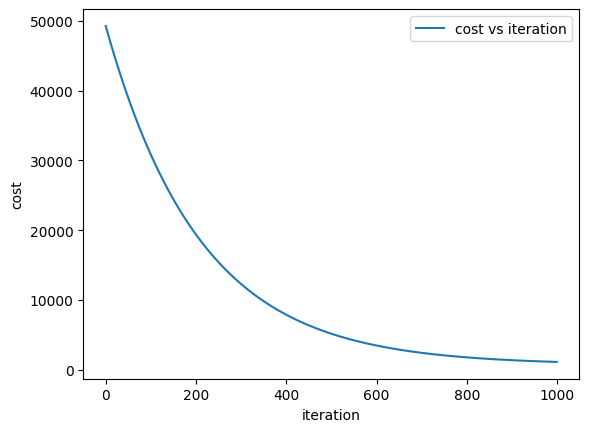

In [71]:
plt.plot(range(iterations),J_wb,label='cost vs iteration')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.legend()
plt.show()

**Evaluation metrics**

In [72]:
def R2(y, y_pred) -> float:
    mean_y = np.mean(y)
    SS_total = np.sum((y - mean_y) ** 2)
    SS_res = np.sum((y - y_pred) ** 2)
    r2 = 1 - (SS_res / SS_total)
    return r2


In [73]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)



In [74]:
def RMSE(y, y_pred):
    return np.sqrt(MSE(y, y_pred))


In [75]:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))


In [76]:
print("R²:", R2(y_train, Prediction))
print("MSE:", MSE(y_train, Prediction))
print("RMSE:", RMSE(y_train, Prediction))
print("MAE:", MAE(y_train, Prediction))

R²: 0.8518084928211371
MSE: 2213.388351223496
RMSE: 47.04666142483966
MAE: 40.99824344557036
